In [1]:
import requests
import json

In [2]:
url = "http://localhost:8000/predict"

Insira um número aleatório para buscarmos uma imagem no MINST. Uma caixa de diálogo vai aparecer no topo do CodeSpace.

In [3]:
# Solicitar ao usuário que insira um número
chosen_number = int(input("Digite um número (0-9): "))

print(f"Número escolhido: {chosen_number}")

Número escolhido: 8


Abaixo, execute para redimensionar e aplicar ajustes a imagem original do MINST

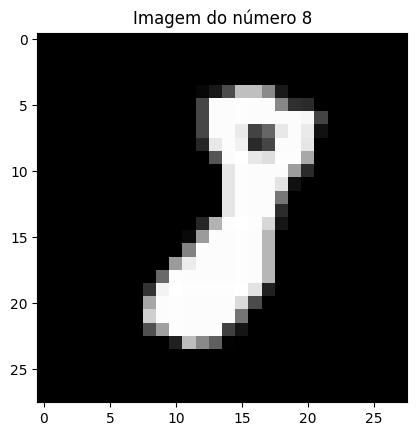

Imagem processada e pronta para ser enviada à API.


In [4]:
import numpy as np
from sklearn.datasets import fetch_openml
import random
import matplotlib.pyplot as plt

# Carregar o dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Separar as features (imagens) e os rótulos (números)
X, y = mnist["data"], mnist["target"]

# Converter os rótulos para inteiros
y = y.astype(int)

# Encontrar todas as imagens que correspondem ao número escolhido
indices = np.where(y == chosen_number)[0]

# Selecionar uma imagem aleatória entre as correspondentes
random_index = random.choice(indices)
selected_image = X[random_index]

# Mostrar a imagem selecionada antes de redimensionar
plt.imshow(selected_image.reshape(28, 28), cmap='gray')
plt.title(f"Imagem do número {chosen_number}")
plt.show()

# Redimensionar a imagem para 8x8
selected_image_8x8 = selected_image.reshape(28, 28)
selected_image_8x8 = selected_image_8x8[::4, ::4]  # Subamostragem para 8x8

# Normalizar os dados (se necessário)
selected_image_8x8 = selected_image_8x8 / 255.0  # Normalizar os pixels para o intervalo [0, 1]

# Achatar o array para uma única dimensão (vetor de características)
input_data = selected_image_8x8.flatten().tolist()

print("Imagem processada e pronta para ser enviada à API.")


EXECUTE ABAIXO PARA ENVIAR PARA API E RECEBER A PREDIÇÃO (lembre de abrir a porta 8000 no Terminal antes de executar)

Para abrir a porta, use o comando a seguir no Terminal: docker run -p 8000:8000 modelo_decisao_fastapi

In [5]:
import requests
import json

# Definir a URL do servidor FastAPI
url = "http://localhost:8000/predict"

# Dados de entrada para a inferência
data = {
    "input": input_data
}

# Enviar a solicitação POST
response = requests.post(url, data=json.dumps(data), headers={"Content-Type": "application/json"})

# Exibir a resposta
print("Status Code:", response.status_code)
print("Prediction:", response.json())


Status Code: 200
Prediction: {'prediction': [8.0]}
